In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [17]:
N_POP = 200
N_GEN = 100

N_DIM = 100

MUT = 0.05
CROSS = 0.5

random_shift = 2*np.random.random((N_DIM))
print (random_shift)

[1.29293599 1.92742644 0.99531394 0.58607652 0.68184199 0.3094119
 0.53384845 0.06099728 1.85499256 1.88629504 0.25786312 0.7700428
 0.35651624 0.94468067 1.02120987 1.95283607 0.32301646 0.03628103
 0.06755432 0.59214471 1.01243434 0.19278548 1.40110919 1.00241592
 0.79028105 0.39110673 1.87599946 0.65674304 1.71699365 1.66899352
 0.84202109 0.84789294 1.17890064 1.69080167 0.45316404 0.85724235
 1.33131629 0.87972144 0.1685275  1.92270154 0.65681764 1.75178012
 0.36130574 0.81028553 1.52974304 1.04870626 1.31738033 0.95833509
 1.82251286 1.99515394 0.19496178 1.33497849 1.24039368 1.47901108
 1.12466179 1.83980545 1.81381032 0.65544864 0.26944497 1.86008992
 0.53466531 0.99910914 0.89807988 1.56563248 0.27391821 0.87001117
 0.83417377 0.50547027 1.77346148 1.77598812 0.69905996 1.48466467
 0.55351024 1.05328108 0.1340727  1.25667332 0.05890599 1.59928397
 0.91454173 0.78093774 1.21834888 1.14607178 1.68238746 0.8662224
 0.39726979 0.58723845 1.5113594  0.78341354 0.39992037 1.9087961

In [21]:
def loss(x):
    n_dim = x.shape[0]
    
    # Sphere
    y = np.sum((random_shift + x)**2)
    return y


def generate_random_point(n_dim=N_DIM, lim=10):
    pt = (2*np.random.random((n_dim,))-1)*lim
    return (pt, loss(pt))

pop = [generate_random_point() for ix in range(N_POP)]
# print(pop)
temp = []

def crossover(p1, p2):
    n_dim = p1.shape[0]
    
    c1 = np.zeros(p1.shape)
    c2 = np.zeros(p2.shape)
    
    split = int(n_dim * CROSS)
    
    if split == 0:
        c1 = p1
        c2 = p2
    else:
        c1[:split] = p1[:split]
        c1[split:] = p2[split:]
        
        c2[:split] = p2[:split]
        c2[split:] = p1[split:]
    return c1, c2

def mutate(x):
    n_dim = x.shape[0]
    X = np.zeros(x.shape)
    
    for ix in range(n_dim):
        r = np.random.random()
        if r < MUT:
            # mutate
            X[ix] = x[ix] + (2*np.random.random() - 1)
        else:
            X[ix] = x[ix]
    return X

In [22]:
losses = []

In [23]:
for gen in range(N_GEN):
    # sort the population
    ord_pop = sorted(pop, key=lambda x: x[1])
    best = ord_pop[0]
#     print (best[1], best[0])
    losses.append(best[1])
    
    # create temp population
    temp = []
    
    while len(temp) < N_POP:
        # select p1 and p2 (parents)
        p1, p2 = random.sample(ord_pop[:int(N_POP/2)], 2)
        
        # apply crossover to generate c1 and c2 (children)
        c1, c2 = crossover(p1[0], p2[0])        
        
        # apply mutation on c1 and c2
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        t = [p1, p2, (c1, loss(c1)), (c2, loss(c2))]
        t_sorted = sorted(t, key=lambda x: x[1])
        # save the best of p1, p2, c1, c2 in temp
        
        temp += t_sorted[:2]
        
    # replace population with temp
    pop = temp

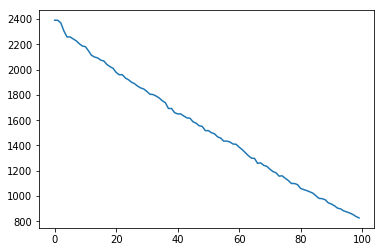

In [24]:
plt.plot(losses)

In [25]:
pop[0]

(array([-2.75071436,  0.04195777,  2.28013985,  1.16619033,  1.22425708,
        -0.5463227 , -1.66778699,  3.68072672, -6.66296587, -1.61893246,
        -1.9425586 , -5.46206165, -0.12712392,  3.44476898, -1.09707156,
        -1.53275403,  1.84567182,  2.96927334, -3.00673   , -3.85847658,
        -2.5633187 ,  0.92762059,  1.32318648, -5.43073274,  5.62119609,
        -3.04953179,  3.82521421, -6.50397914,  2.85398697, -2.84345117,
        -1.38752325, -2.83659067,  0.86662611, -2.97914169,  2.05698515,
         1.59173098,  0.95568477,  0.07708479, -3.79518875, -2.17938447,
        -2.02660373, -1.60192003,  3.92444254,  0.79886912, -2.17313388,
         0.53189543, -3.43866717, -6.582709  ,  0.23164575, -1.94817811,
        -3.88478034, -3.6172896 , -0.38813061,  0.38929336, -2.3344015 ,
        -0.76109274, -2.67895797, -2.90243596,  1.23353803, -5.4265649 ,
        -2.56172081, -0.32793234, -3.55541875, -2.60218102, -4.45892395,
        -5.34042519, -2.18994401, -0.01616654,  2.2